# WRAPPER & LIBRARIES

## INSTALLING WRAPPER & LIBRARIES

In [1]:
# pip install python-steam-api
# pip install googletrans==4.0.0-rc1

# Un wrapper en Python est une couche d'abstraction qui facilite l'utilisation d'une fonctionnalité ou d'une API externe dans votre programme Python en fournissant une interface plus simple 
# et en gérant les détails d'interaction avec cette fonctionnalité externe.

## LOADING LIBRARIES

In [2]:
# **************************************************************************************
# LIBRARIES ****************************************************************************
# **************************************************************************************

# General-purpose libraries for operating system interactions, JSON data manipulation, and date/time handling.
import os  # Interact with the operating system
import json  # Work with JSON data
from random import randint  # Generate random integers
from time import sleep  # Introduce delays in code execution

from datetime import datetime, timedelta  # Manipulate dates and times
# **************************************************************************************

# Fundamental scientific computing libraries like NumPy and Pandas.
import numpy as np  # Fundamental package for scientific computing
import pandas as pd  # Data manipulation library
# **************************************************************************************

# **************************************************************************************
# **************************************************************************************

# Specialized libraries for scientific computing, namely SciPy
import scipy  # Scientific computing and technical computing library
import scipy.stats as st
import math

# **************************************************************************************

# Web-related tasks, such as making HTTP requests, parsing HTML/XML data, and web scraping
import requests  # Perform HTTP requests
from bs4 import BeautifulSoup  # Parse HTML and XML data
# **************************************************************************************

#String operations
import regex as re
import string
from nltk.corpus import stopwords

# Pretty-print Python data structures
import pprint
# **************************************************************************************

# Visualization oriented
import matplotlib.pyplot as plt  # Create static visualizations
import seaborn as sns  # Statistical data visualization
from plotly import express as px  # Create interactive plots and charts

# **************************************************************************************
# **************************************************************************************

# Machine learning : preprocessing, dimensionality reduction, one-hot encoding, and clustering
import sklearn  # Machine learning library

from sklearn import svm

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import OneHotEncoder  # One-hot encode categorical features
from sklearn.preprocessing import StandardScaler  # Standardize features
from sklearn.preprocessing import MinMaxScaler  # Standardize features


from sklearn.decomposition import PCA  # Perform dimensionality reduction
from sklearn.cluster import KMeans  # Perform clustering

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    precision_recall_curve, roc_curve, roc_auc_score
)


#Handling Imbalanced Datasets
import imblearn  # Handle imbalanced datasets in machine learning

# **************************************************************************************
# **************************************************************************************

#Web Scraping
import scrapy  # Web scraping framework

#Saving Stuff
import pickle

# Translating
from googletrans import Translator

#Deep Learning
# import pytorch  # Deep learning library



# **************************************************************************************
# FUNCTIONS ****************************************************************************
# **************************************************************************************

#from functions import <name of function here>

# ***************************** PART I - ML *********************************

## Preparing the adequate Dataframe for ML operations

### Loading our Games Database

In [3]:
data = pd.read_csv('../CSVs_Docs/steam.csv')

In [4]:
df = data

In [5]:
df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

### Exploding "genres" and "steamspy_tags" in order to be able to Scale them afterwards

#### Exploding "genres"

In [7]:
game_genres_df = df[['appid', 'genres']].copy()

In [8]:
# Split and explode
game_genres_df["genres"] = game_genres_df["genres"].str.split(";")
reindexed_game_genres_df = game_genres_df.explode("genres")

# Create pivot table
game_genres_pivot_df = reindexed_game_genres_df.groupby(['appid', 'genres']).size().apply(lambda x: 1 if x > 0 else 0).unstack(fill_value=0)
game_genres_pivot_df.reset_index(inplace=True)

# Merge game_genres_pivot_df with df, keeping all rows from both
game_genres_merged_df = pd.merge(df, game_genres_pivot_df, on='appid', how='outer')

# List column names from the original DataFrame and the merged genre columns
original_columns = df.columns.tolist()
genre_columns = [col for col in game_genres_merged_df.columns if col not in original_columns]

# Arrange the columns so that the genre columns come immediately after 'genres'
final_column_order = original_columns[:original_columns.index('genres')+1] + genre_columns + original_columns[original_columns.index('genres')+1:]
game_genres_merged_df = game_genres_merged_df[final_column_order]

game_genres_merged_df.head()


,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Violent,Web Publishing,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,0,0,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


#### Exploding "steamspy_tags" from game_genres_merged_df

In [9]:
game_steamspy_tags_df = game_genres_merged_df[['appid', 'steamspy_tags']].copy()

In [10]:
# Split and explode
game_steamspy_tags_df["steamspy_tags"] = game_steamspy_tags_df["steamspy_tags"].str.split(";")
reindexed_steamspy_tags_df = game_steamspy_tags_df.explode("steamspy_tags")

# Create pivot table
game_steamspy_tags_pivot_df = reindexed_steamspy_tags_df.pivot(index='appid', columns='steamspy_tags', values='steamspy_tags')
game_steamspy_tags_pivot_df = game_steamspy_tags_pivot_df.notnull().astype('int')
game_steamspy_tags_pivot_df.reset_index(inplace=True)

# Merge game_steamspy_tags_pivot_df with df, keeping all rows from both
game_steamspy_tags_merged_df = pd.merge(game_genres_merged_df, game_steamspy_tags_pivot_df, on='appid', how='outer')

game_steamspy_tags_merged_df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,...,Warhammer 40K,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,0,0,0,0,0,0,0,0
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,0,0,0,0,0,0,0,0
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,...,0,0,0,0,0,0,1,0,0,0
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,...,0,0,0,0,0,0,0,0,0,0
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,Adventure;Casual;Indie,...,0,0,0,0,0,0,0,0,0,0
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,Action;Adventure;Indie,...,0,0,0,0,0,0,0,0,0,0
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,...,0,0,0,0,0,0,0,0,0,0
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,Adventure;Casual;Indie,...,0,0,0,0,0,0,0,0,0,0


In [11]:
# Get list of column names from the original DataFrame and the merged steamspy_tags columns for checking purposes
original_columns = game_genres_merged_df.columns.tolist()

print(f"Columns in the merged DataFrame: {game_steamspy_tags_merged_df.columns.tolist()}")

Columns in the merged DataFrame: ['appid', 'name', 'release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'Accounting', 'Action_x', 'Adventure_x', 'Animation & Modeling_x', 'Audio Production_x', 'Casual_x', 'Design & Illustration_x', 'Documentary_x', 'Early Access_x', 'Education_x', 'Free to Play_x', 'Game Development_x', 'Gore_x', 'Indie_x', 'Massively Multiplayer_x', 'Nudity_x', 'Photo Editing_x', 'RPG_x', 'Racing_x', 'Sexual Content_x', 'Simulation_x', 'Software Training_x', 'Sports_x', 'Strategy_x', 'Tutorial', 'Utilities_x', 'Video Production_x', 'Violent_x', 'Web Publishing_x', 'steamspy_tags', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime', 'median_playtime', 'owners', 'price', '1980s', "1990's", '2.5D', '2D', '2D Fighter', '360 Video', '3D', '3D Platformer', '3D Vision', '4 Player Local', '4X', '6DOF', 'Abstract', 'Action_y', 'Action RPG', 'Action-Adventure', 'Adventure_y', 'Agriculture', 'Aliens', '

### CSV export for checking operations

In [12]:
# scaling_ready_df = game_steamspy_tags_merged_df
# scaling_ready_df.to_csv("Check_Check.csv")

### Creating the final DataFrame we will use for ML

In [13]:
# Retrieve our latest modifications of the DataFrame and stock them in a new variable
scaling_ready_df = game_steamspy_tags_merged_df

# Identify categorical columns to drop
columns_to_drop = ['appid','name','release_date','developer','publisher','platforms','categories','genres','steamspy_tags','owners']

# Drop the categorical columns
pre_scaling_ready_df = scaling_ready_df.drop(columns=columns_to_drop)

In [14]:
kept_columns_list = pre_scaling_ready_df.columns
kept_columns_list

Index(['english', 'required_age', 'Accounting', 'Action_x', 'Adventure_x',
       'Animation & Modeling_x', 'Audio Production_x', 'Casual_x',
       'Design & Illustration_x', 'Documentary_x',
       ...
       'Warhammer 40K', 'Web Publishing_y', 'Werewolves', 'Western',
       'Word Game', 'World War I', 'World War II', 'Wrestling', 'Zombies',
       'e-sports'],
      dtype='object', length=376)

## ML Operations

### Performing Scaling with StandardScaler

In [15]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the DataFrame using StandardScaler
X_normalized_df = scaler.fit_transform(pre_scaling_ready_df)

# Print the original df
print("Original df:")
display(pre_scaling_ready_df.head())

# Create a DataFrame with the normalized data
scaled_df = pd.DataFrame(X_normalized_df, columns=kept_columns_list)

# Print the scaled df
print("\nScaled df:")
scaled_df.head()

Original df:


,english,required_age,Accounting,Action_x,Adventure_x,Animation & Modeling_x,Audio Production_x,Casual_x,Design & Illustration_x,Documentary_x,...,Warhammer 40K,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Scaled df:


,english,required_age,Accounting,Action_x,Adventure_x,Animation & Modeling_x,Audio Production_x,Casual_x,Design & Illustration_x,Documentary_x,...,Warhammer 40K,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,0.138696,-0.147507,-0.014888,1.128998,-0.767221,-0.054096,-0.032745,-0.778072,-0.056777,-0.006077,...,-0.032745,-0.018235,-0.010527,-0.029158,-0.019222,-0.029158,-0.069460,-0.017192,-0.076615,-0.008595
1,0.138696,-0.147507,-0.014888,1.128998,-0.767221,-0.054096,-0.032745,-0.778072,-0.056777,-0.006077,...,-0.032745,-0.018235,-0.010527,-0.029158,-0.019222,-0.029158,-0.069460,-0.017192,-0.076615,-0.008595
2,0.138696,-0.147507,-0.014888,1.128998,-0.767221,-0.054096,-0.032745,-0.778072,-0.056777,-0.006077,...,-0.032745,-0.018235,-0.010527,-0.029158,-0.019222,-0.029158,14.396848,-0.017192,-0.076615,-0.008595
3,0.138696,-0.147507,-0.014888,1.128998,-0.767221,-0.054096,-0.032745,-0.778072,-0.056777,-0.006077,...,-0.032745,-0.018235,-0.010527,-0.029158,-0.019222,-0.029158,-0.069460,-0.017192,-0.076615,-0.008595
4,0.138696,-0.147507,-0.014888,1.128998,-0.767221,-0.054096,-0.032745,-0.778072,-0.056777,-0.006077,...,-0.032745,-0.018235,-0.010527,-0.029158,-0.019222,-0.029158,-0.069460,-0.017192,-0.076615,-0.008595


### CSV export for checking operations

In [16]:
# pre_scaling_ready_df_normalized.to_csv("Check_Check2.csv")

### Performing PCA on our scaled DataFrame

In [17]:
# Perform PCA on the normalized data
pca = PCA(n_components=10)
pca.fit(X_normalized_df)

# Get the contribution of each principal component to the data variance
# En utilisant pca.explained_variance_ratio_, on peut obtenir une idée de la contribution de chaque composante principale à la variance des données.
# Cela peut aider à décider combien de composantes principales utiliser pour réduire la dimensionnalité ou pour d'autres analyses.

# Get the contribution of each principal component to the data variance
explained_variance_ratio = pca.explained_variance_ratio_

# Print the contribution of each principal component
print("Explained variance ratio:")
print(explained_variance_ratio)

# Calculate the cumulative sum of explained variance ratio
# Déterminer combien de composantes principales tu souhaites conserver, en fonction du pourcentage de variance que tu souhaites préserver.
# Par exemple, si la somme cumulative atteint 0,95, cela signifie que les composantes principales retenues capturent 95 % de la variance totale des données.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the cumulative sum of explained variance ratio
print("\nCumulative variance ratio:")
print(cumulative_variance_ratio)

Explained variance ratio:
[0.0153286  0.00857102 0.00810815 0.00754184 0.00709684 0.00673706
 0.00645631 0.00634351 0.00602632 0.00585597]

Cumulative variance ratio:
[0.0153286  0.02389962 0.03200777 0.03954962 0.04664646 0.05338352
 0.05983982 0.06618333 0.07220966 0.07806562]


### Performing Scaling with MinMaxScaler

In [18]:
# Create an instance of StandardScaler
scaler = MinMaxScaler()

# Standardize the DataFrame using StandardScaler
X_normalized_df = scaler.fit_transform(pre_scaling_ready_df)

# Print the original df
print("Original df:")
display(pre_scaling_ready_df.head())

# Create a DataFrame with the normalized data
scaled_df = pd.DataFrame(X_normalized_df, columns=kept_columns_list)

# Print the scaled df
print("\nScaled df:")
scaled_df.head()

Original df:


,english,required_age,Accounting,Action_x,Adventure_x,Animation & Modeling_x,Audio Production_x,Casual_x,Design & Illustration_x,Documentary_x,...,Warhammer 40K,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Scaled df:


,english,required_age,Accounting,Action_x,Adventure_x,Animation & Modeling_x,Audio Production_x,Casual_x,Design & Illustration_x,Documentary_x,...,Warhammer 40K,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Performing PCA on our scaled DataFrame

In [19]:
# Perform PCA on the normalized data
# Prepare our PCA and fit it on our data
pca = PCA(n_components=10)
pca.fit(X_normalized_df)

# Get the contribution of each principal component to the data variance
# En utilisant pca.explained_variance_ratio_, on peut obtenir une idée de la contribution de chaque composante principale à la variance des données.
# Cela peut aider à décider combien de composantes principales utiliser pour réduire la dimensionnalité ou pour d'autres analyses.

# Get the contribution of each principal component to the data variance
explained_variance_ratio = pca.explained_variance_ratio_

# Print the contribution of each principal component
print("Explained variance ratio:")
print(explained_variance_ratio)

# Calculate the cumulative sum of explained variance ratio
# Déterminer combien de composantes principales tu souhaites conserver, en fonction du pourcentage de variance que tu souhaites préserver.
# Par exemple, si la somme cumulative atteint 0,95, cela signifie que les composantes principales retenues capturent 95 % de la variance totale des données.
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Print the cumulative sum of explained variance ratio
print("\nCumulative variance ratio:")
print(cumulative_variance_ratio)

Explained variance ratio:
[0.14103224 0.11902066 0.11288136 0.0832511  0.05879911 0.05652533
 0.05131095 0.04390714 0.03035478 0.01875115]

Cumulative variance ratio:
[0.14103224 0.26005289 0.37293426 0.45618536 0.51498446 0.57150979
 0.62282075 0.66672789 0.69708267 0.71583382]


### Saving our Scaler in a file with PICKLE

In [20]:
# import pickle

# #Ici, nous ouvrons un fichier nommé "scaler.pkl" en mode d'écriture binaire ('wb'), puis nous utilisons pickle.dump() pour écrire l'objet scaler dans le fichier.
# with open('scaler.pkl', 'wb') as fichier:
#     pickle.dump(scaler, fichier)

### Finding out the best number of Clusters to use with the Elbow Method

Training a K-Means model with 50 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 100 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 200 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 400 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 500 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal K')

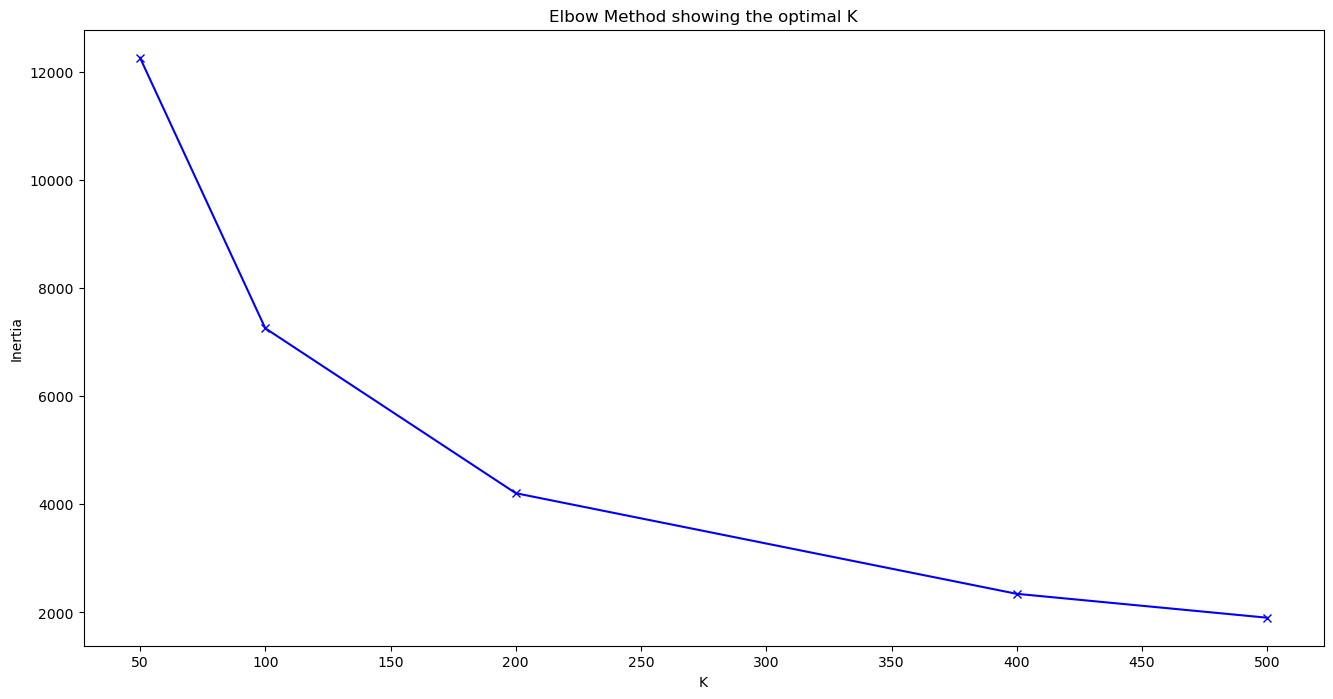

In [21]:
# Trying with a different number clusters
K = [50, 100, 200, 400, 500] 
inertia = []

X_pca = pca.transform(X_normalized_df) 


for k in K: #for every df in set build a inertia
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Just plot it
plt.figure(figsize=(16,8))
plt.plot(K, inertia, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.xticks(np.arange(min(K), max(K)+1, 50))
plt.title("Elbow Method showing the optimal K")

Training a K-Means model with 500 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 600 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 700 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 800 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 900 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Training a K-Means model with 1000 clusters! 



c:\Users\theya\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'Elbow Method showing the optimal K')

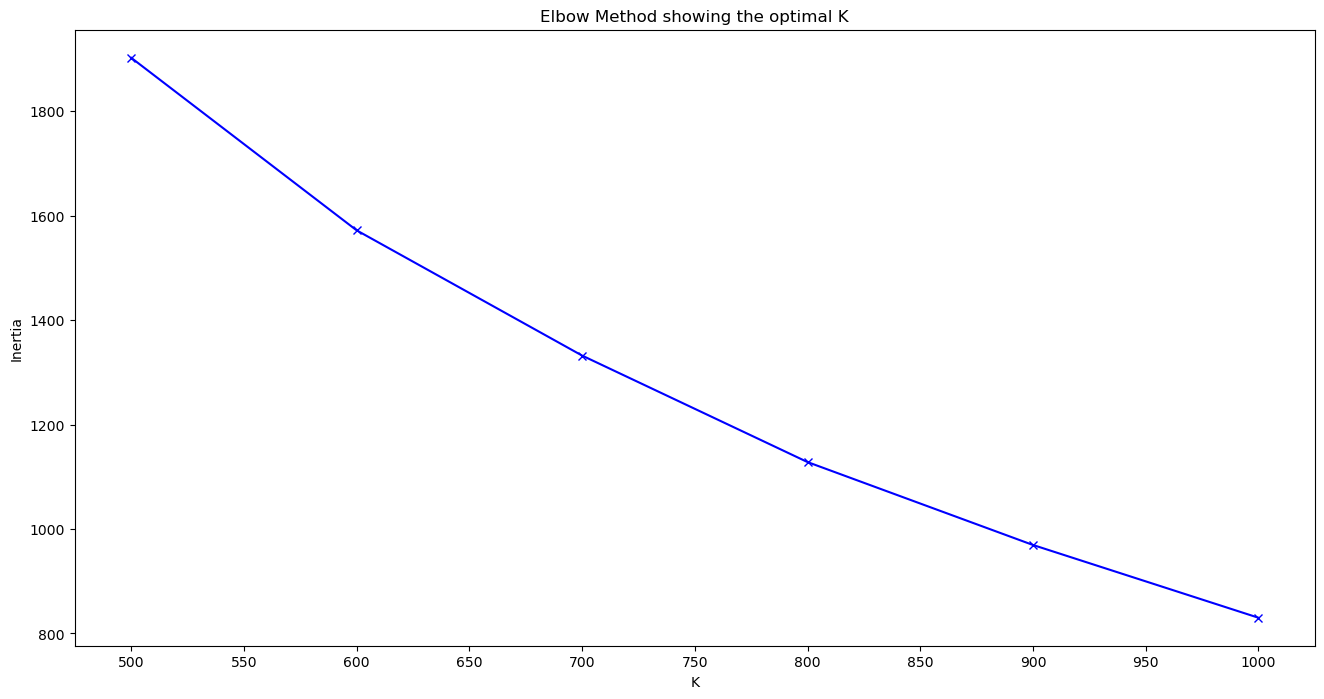

In [22]:
# Trying with a different number cluster
K = [500, 600, 700, 800, 900, 1000]
inertia = []

X_pca = pca.transform(X_normalized_df)


for k in K: #for every df in set build a inertia
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k, random_state=1234)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Just plot it
plt.figure(figsize=(16,8))
plt.plot(K, inertia, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.xticks(np.arange(min(K), max(K)+1, 50))
plt.title("Elbow Method showing the optimal K")

### Clustering with KMeans algorithm from our axes in PCA

In [23]:
# Take results of PCA
X_pca = pca.transform(X_normalized_df)


# Si je mets ces 10 jeux dans ce cluster est ce que c'est mieux que si je mets cet autre lot de jeux dans ce cluster
# Pour chaque jeu calcule la distance avec les jeux les plus proches
# Quand il a trouvé la répartition, assigne les clusters déterminés

# Apply K-means clustering to the transformed data
kmeans = KMeans(n_clusters=500, n_init=12)
kmeans.fit(X_pca)
cluster_ids = kmeans.predict(X_pca)
cluster_distances = kmeans.transform(X_pca)

# Print the cluster IDs and distances
print("\nCluster IDs:")
print(cluster_ids)
print("\nCluster distances:")
print(cluster_distances)


Cluster IDs:
[  6   6 228 ...  13  24  24]

Cluster distances:
[[2.04519339 1.44378841 2.85872372 ... 1.8833531  2.49928403 2.83297123]
 [2.04513745 1.44365035 2.85867648 ... 1.88341254 2.49924442 2.83294458]
 [1.66327087 1.60300607 2.56733078 ... 1.91332702 2.15209992 2.53494905]
 ...
 [1.97726652 1.41240264 2.81648766 ... 2.77456372 2.84435989 2.79558427]
 [1.98387491 2.44294767 1.98539713 ... 3.41683043 2.80763884 1.95654652]
 [1.98387491 2.44294767 1.98539713 ... 3.41683043 2.80763884 1.95654652]]


In [ ]:
# Cluster-counting, if needed

from collections import Counter

cluster_counts = Counter(cluster_ids)
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} occurrences")

In [24]:
# Take results of PCA
X_pca = pca.transform(X_normalized_df)


# Si je mets ces 10 jeux dans ce cluster est ce que c'est mieux que si je mets cet autre lot de jeux dans ce cluster
# Pour chaque jeu calcule la distance avec les jeux les plus proches
# Quand il a trouvé la répartition, assigne les clusters déterminés

# Apply K-means clustering to the transformed data
kmeans = KMeans(n_clusters=750, n_init=12)
kmeans.fit(X_pca)
cluster_ids = kmeans.predict(X_pca)
cluster_distances = kmeans.transform(X_pca)

# Print the cluster IDs and distances
print("\nCluster IDs:")
print(cluster_ids)
print("\nCluster distances:")
print(cluster_distances)


Cluster IDs:
[ 17  17 192 ...   6   1   1]

Cluster distances:
[[2.02744439 2.86628328 2.03183578 ... 2.19105542 2.09083698 1.79431811]
 [2.02744934 2.86616586 2.03171999 ... 2.19099606 2.09092431 1.79435254]
 [1.60707331 2.5936467  2.13745562 ... 1.81639399 1.62313921 1.61963647]
 ...
 [2.83030244 1.99245763 1.99565103 ... 2.06635852 2.90430705 2.60313603]
 [2.82799411 0.00802913 1.99217608 ... 2.05251379 2.90129627 2.60203597]
 [2.82799411 0.00802913 1.99217607 ... 2.05251379 2.90129626 2.60203597]]


In [ ]:
# Cluster-counting, if needed

from collections import Counter

cluster_counts = Counter(cluster_ids)
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} occurrences")

### Use the model with the best K to assign each observation in your data frame to its cluster number using model.predict (add cluster columns to the pandas data frame)



### Assigning a cluster to each game

Cluster 17: 790 occurrences
Cluster 192: 60 occurrences
Cluster 219: 27 occurrences
Cluster 586: 14 occurrences
Cluster 256: 31 occurrences
Cluster 636: 10 occurrences
Cluster 28: 579 occurrences
Cluster 26: 331 occurrences
Cluster 217: 35 occurrences
Cluster 16: 455 occurrences
Cluster 23: 256 occurrences
Cluster 67: 154 occurrences
Cluster 87: 66 occurrences
Cluster 349: 20 occurrences
Cluster 13: 1064 occurrences
Cluster 588: 12 occurrences
Cluster 357: 12 occurrences
Cluster 20: 186 occurrences
Cluster 585: 9 occurrences
Cluster 615: 11 occurrences
Cluster 109: 153 occurrences
Cluster 328: 14 occurrences
Cluster 172: 106 occurrences
Cluster 279: 25 occurrences
Cluster 55: 76 occurrences
Cluster 9: 482 occurrences
Cluster 32: 484 occurrences
Cluster 579: 7 occurrences
Cluster 35: 101 occurrences
Cluster 258: 111 occurrences
Cluster 647: 11 occurrences
Cluster 338: 14 occurrences
Cluster 5: 413 occurrences
Cluster 50: 73 occurrences
Cluster 477: 14 occurrences
Cluster 618: 11 occurre

In [26]:
scaled_df['cluster'] = cluster_ids
scaled_df

,english,required_age,Accounting,Action_x,Adventure_x,Animation & Modeling_x,Audio Production_x,Casual_x,Design & Illustration_x,Documentary_x,...,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports,cluster
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,192
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
27071,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
27072,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
27073,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [27]:
final_df = pd.merge(scaling_ready_df[['appid','name','release_date','developer','publisher','platforms','categories','genres','steamspy_tags','owners']], scaled_df, left_index=True, right_index=True)
final_df

,appid,name,release_date,developer,publisher,platforms,categories,genres,steamspy_tags,owners,...,Web Publishing_y,Werewolves,Western,Word Game,World War I,World War II,Wrestling,Zombies,e-sports,cluster
0,10,Counter-Strike,2000-11-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,10000000-20000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
1,20,Team Fortress Classic,1999-04-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,5000000-10000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
2,30,Day of Defeat,2003-05-01,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,5000000-10000000,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,192
3,40,Deathmatch Classic,2001-06-01,Valve,Valve,windows;mac;linux,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,5000000-10000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
4,50,Half-Life: Opposing Force,1999-11-01,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,5000000-10000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,SHEN JIAWEI,SHEN JIAWEI,windows,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,0-20000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
27071,1065570,Cyber Gun,2019-04-23,Semyon Maximov,BekkerDev Studio,windows,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0-20000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
27072,1065650,Super Star Blast,2019-04-24,EntwicklerX,EntwicklerX,windows,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,0-20000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,Yustas Game Studio,Alawar Entertainment,windows;mac,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0-20000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [28]:
df.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price'],
      dtype='object')

In [29]:
columns_to_keep = ["appid", "name", "release_date", "english", "developer", "publisher",
       "platforms", "required_age", "categories", "genres", "steamspy_tags",
       "achievements", "positive_ratings", "negative_ratings",
       "average_playtime", "median_playtime", "owners", "price", "cluster"]

final_df_simplified = final_df.loc[:, columns_to_keep]

In [30]:
final_df_simplified.columns

Index(['appid', 'name', 'release_date', 'english', 'developer', 'publisher',
       'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags',
       'achievements', 'positive_ratings', 'negative_ratings',
       'average_playtime', 'median_playtime', 'owners', 'price', 'cluster'],
      dtype='object')

In [31]:
final_df_simplified

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,cluster
0,10,Counter-Strike,2000-11-01,1.0,Valve,Valve,windows;mac;linux,0.0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.000000,4.709341e-02,0.006855,0.092391,0.001663,10000000-20000000,0.017038,17
1,20,Team Fortress Classic,1999-04-01,1.0,Valve,Valve,windows;mac;linux,0.0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.000000,1.254725e-03,0.001300,0.001453,0.000325,5000000-10000000,0.009455,17
2,30,Day of Defeat,2003-05-01,1.0,Valve,Valve,windows;mac;linux,0.0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0.000000,1.291784e-03,0.000817,0.000981,0.000178,5000000-10000000,0.009455,192
3,40,Deathmatch Classic,2001-06-01,1.0,Valve,Valve,windows;mac;linux,0.0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0.000000,4.813939e-04,0.000548,0.001353,0.000965,5000000-10000000,0.009455,17
4,50,Half-Life: Opposing Force,1999-11-01,1.0,Gearbox Software,Valve,windows;mac;linux,0.0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0.000000,1.985324e-03,0.000591,0.003273,0.002177,5000000-10000000,0.009455,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1.0,SHEN JIAWEI,SHEN JIAWEI,windows,0.0,Single-player;Steam Achievements,Adventure;Casual;Indie,Adventure;Indie;Casual,0.000713,1.134471e-06,0.000000,0.000000,0.000000,0-20000,0.004953,1
27071,1065570,Cyber Gun,2019-04-23,1.0,Semyon Maximov,BekkerDev Studio,windows,0.0,Single-player,Action;Adventure;Indie,Action;Indie;Adventure,0.000000,3.025256e-06,0.000002,0.000000,0.000000,0-20000,0.004005,2
27072,1065650,Super Star Blast,2019-04-24,1.0,EntwicklerX,EntwicklerX,windows,0.0,Single-player;Multi-player;Co-op;Shared/Split ...,Action;Casual;Indie,Action;Indie;Casual,0.002444,0.000000e+00,0.000002,0.000000,0.000000,0-20000,0.009455,6
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1.0,Yustas Game Studio,Alawar Entertainment,windows;mac,0.0,Single-player;Steam Cloud,Adventure;Casual;Indie,Indie;Casual;Adventure,0.000000,7.563141e-07,0.000000,0.000000,0.000000,0-20000,0.012299,1


### Saving model with best K as final model using Pickle - in case

In [32]:
# meilleur_k = 500  # Remplacez par le meilleur k que vous avez sélectionné
# kmeans_final = KMeans(n_clusters=meilleur_k)

# kmeans_final.fit(X_pca)  # Remplacez X_pca par vos données normalisées

# # Définir le nom du fichier pour sauvegarder le modèle
# nom_fichier_modele = "k_means_final_model.pkl"

# # Sauvegarder le modèle avec Pickle
# with open(nom_fichier_modele, 'wb') as fichier:
#     pickle.dump(kmeans_final, fichier)

In [33]:
#  (like , DBSCAN, etc.)
# for c in np.unique(cluster_ids):

#     # For each unique cluster id, create a scatter plot of the 2D PCA-transformed data points that belong to that cluster.
#     # The scatter plot's x and y coordinates are the first and second PCA components respectively.
#     # Points belonging to the same cluster will have the same color.
#     # 'marker' sets the shape of points and 's' sets the size of points in the scatter plot.
#     plt.scatter(X_pca[cluster_ids == c, 0], X_pca[cluster_ids == c, 1], marker='.', s=10)


### Check if clustering seems OK with a scatter plot

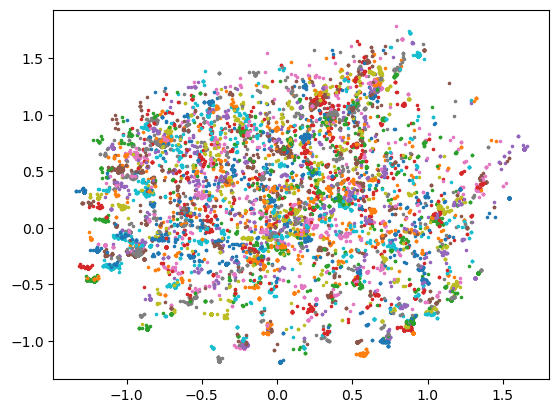

In [34]:
# Loop through all unique cluster ids obtained from K-means clustering algorithm

for c in np.unique(cluster_ids):
    plt.scatter(X_pca[cluster_ids == c, 0], X_pca[cluster_ids == c, 1], marker='.', s=10)

In [35]:
# #Utilisation de fit_predict de KMeans pour effectuer à la fois l'ajustement du modèle K-means 
# # et la prédiction des clusters pour les données normalisées X_normalized.

# cluster_ids = KMeans(n_clusters=14, n_init=100).fit_predict(X_normalized)

# for c in np.unique(cluster_ids):
#     plt.scatter(X_normalized[cluster_ids == c, 0], X_normalized[cluster_ids == c, 1], marker='.', s=50)

# plt.show()

# ***************************** PART II - DEMO *****************************

## API Config

In [36]:
from steam import Steam  # Steam API Library
from decouple import config

# Retrieves my STEAM_API_KEY in my environnement variables
KEY = config("STEAM_API_KEY")

# Creates a class "Steam" based on the API KEY previously retrieved
steam = Steam(KEY)

### A few chained resquests to find friends of friends of friends

In [37]:
# Mine
friends_list = steam.users.get_user_friends_list("76561198084178563")
friends_list

{'friends': [{'steamid': '76561198074180087',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'Sen',
   'profileurl': 'https://steamcommunity.com/profiles/76561198074180087/',
   'avatar': 'https://avatars.steamstatic.com/798e1e8f8dd4565f5d079b8eab01f84c317e99de.jpg',
   'avatarmedium': 'https://avatars.steamstatic.com/798e1e8f8dd4565f5d079b8eab01f84c317e99de_medium.jpg',
   'avatarfull': 'https://avatars.steamstatic.com/798e1e8f8dd4565f5d079b8eab01f84c317e99de_full.jpg',
   'avatarhash': '798e1e8f8dd4565f5d079b8eab01f84c317e99de',
   'lastlogoff': 1686254394,
   'personastate': 0,
   'primaryclanid': '103582791457256652',
   'timecreated': 1351168992,
   'personastateflags': 0,
   'relationship': 'friend',
   'friend_since': 1364424241},
  {'steamid': '76561198046891914',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'Hawk',
   'commentpermission': 1,
   'profileurl': 'https://steamcommunity.com/id/koqonfais/',
   'avatar': 'https:

In [38]:
# Pastek
friends_list = steam.users.get_user_friends_list("76561198084178563")
friends_list

{'friends': [{'steamid': '76561198046891914',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'Hawk',
   'commentpermission': 1,
   'profileurl': 'https://steamcommunity.com/id/koqonfais/',
   'avatar': 'https://avatars.steamstatic.com/54d7cc914930ad90ef858bb0d845a6b7b50dbc39.jpg',
   'avatarmedium': 'https://avatars.steamstatic.com/54d7cc914930ad90ef858bb0d845a6b7b50dbc39_medium.jpg',
   'avatarfull': 'https://avatars.steamstatic.com/54d7cc914930ad90ef858bb0d845a6b7b50dbc39_full.jpg',
   'avatarhash': '54d7cc914930ad90ef858bb0d845a6b7b50dbc39',
   'lastlogoff': 1686265844,
   'personastate': 0,
   'primaryclanid': '103582791437768734',
   'timecreated': 1313328123,
   'personastateflags': 0,
   'loccountrycode': 'NO',
   'locstatecode': '08',
   'relationship': 'friend',
   'friend_since': 1408644248},
  {'steamid': '76561198077061193',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'Blako99',
   'commentpermission': 1,
   'profileu

In [39]:
# "XnodɐɥϽ" - friend of friend
friends_list = steam.users.get_user_friends_list("76561197987339465")
friends_list

{'friends': [{'steamid': '76561198167397195',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'Magicovore',
   'profileurl': 'https://steamcommunity.com/profiles/76561198167397195/',
   'avatar': 'https://avatars.steamstatic.com/f83be087851366487b19cc16ad60601073b426a0.jpg',
   'avatarmedium': 'https://avatars.steamstatic.com/f83be087851366487b19cc16ad60601073b426a0_medium.jpg',
   'avatarfull': 'https://avatars.steamstatic.com/f83be087851366487b19cc16ad60601073b426a0_full.jpg',
   'avatarhash': 'f83be087851366487b19cc16ad60601073b426a0',
   'personastate': 0,
   'primaryclanid': '103582791429521408',
   'timecreated': 1418246111,
   'personastateflags': 0,
   'relationship': 'friend',
   'friend_since': 1588706048},
  {'steamid': '76561197997248307',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'Yoannlink /C/ \ue0ce\ue0d8\ue0ce',
   'commentpermission': 1,
   'profileurl': 'https://steamcommunity.com/id/yoannlink/',
   'avatar': '

In [40]:
# "Hicks"
friends_list = steam.users.get_user_friends_list("76561197960510398")
friends_list

{'friends': [{'steamid': '76561198084699514',
   'communityvisibilitystate': 2,
   'profilestate': 1,
   'personaname': 'Maximum BK',
   'profileurl': 'https://steamcommunity.com/profiles/76561198084699514/',
   'avatar': 'https://avatars.steamstatic.com/fef49e7fa7e1997310d705b2a6158ff8dc1cdfeb.jpg',
   'avatarmedium': 'https://avatars.steamstatic.com/fef49e7fa7e1997310d705b2a6158ff8dc1cdfeb_medium.jpg',
   'avatarfull': 'https://avatars.steamstatic.com/fef49e7fa7e1997310d705b2a6158ff8dc1cdfeb_full.jpg',
   'avatarhash': 'fef49e7fa7e1997310d705b2a6158ff8dc1cdfeb',
   'personastate': 0,
   'relationship': 'friend',
   'friend_since': 1416431265},
  {'steamid': '76561197971445249',
   'communityvisibilitystate': 2,
   'profilestate': 1,
   'personaname': 'OXXXI BALBOA',
   'profileurl': 'https://steamcommunity.com/profiles/76561197971445249/',
   'avatar': 'https://avatars.steamstatic.com/b9db45fa62698e61af64848b3aa3e445ed7b723d.jpg',
   'avatarmedium': 'https://avatars.steamstatic.com/b

In [41]:
# "Got"
friends_list = steam.users.get_user_friends_list("76561197960326212")
friends_list

{'friends': [{'steamid': '76561198069614425',
   'communityvisibilitystate': 3,
   'profilestate': 1,
   'personaname': 'PlayDa',
   'commentpermission': 2,
   'profileurl': 'https://steamcommunity.com/profiles/76561198069614425/',
   'avatar': 'https://avatars.steamstatic.com/213a4bdb8d1aadfed71818cafce9a21816cb7c77.jpg',
   'avatarmedium': 'https://avatars.steamstatic.com/213a4bdb8d1aadfed71818cafce9a21816cb7c77_medium.jpg',
   'avatarfull': 'https://avatars.steamstatic.com/213a4bdb8d1aadfed71818cafce9a21816cb7c77_full.jpg',
   'avatarhash': '213a4bdb8d1aadfed71818cafce9a21816cb7c77',
   'personastate': 0,
   'realname': 'El Arja Walid',
   'primaryclanid': '103582791433471589',
   'timecreated': 1345340321,
   'personastateflags': 0,
   'relationship': 'friend',
   'friend_since': 1436129127},
  {'steamid': '76561197960980148',
   'communityvisibilitystate': 2,
   'profilestate': 1,
   'personaname': 'noukiiiii',
   'profileurl': 'https://steamcommunity.com/id/_33_/',
   'avatar': '

In [42]:
my_acc_name = "steaaminn"
my_steam_id = 76561198084178563

pipo = 76561197979183274 # Top 3 not really compatible
pastek = 76561197961064971 # Top 3 compatible

the12thchairman = 76561198995017863 # User from the wrapper website - empty games library

random1 = 76561128335099863 # Completely random user - empty games library
random2 = 76561148995017863 # Completely random user - empty games library
random3 = 76561198966017863 # Completely random user - empty games library

## Get User's Steam ID

In [43]:
user_steam_id = 76561198084178563

In [44]:
# user_steam_id

# arguments: user_steam_id (input)
# user_steam_id = input("Please enter your Steam ID : ")

print("Your Steam ID is :", user_steam_id)

Your Steam ID is : 76561198084178563


In [45]:
user_steam_id = 76561197960326212

In [46]:
import pprint

# user_details_from_steam_id

# arguments: steam_id
user_details = steam.users.get_user_details(user_steam_id)
pprint.pprint(user_details)

{'player': {'avatar': 'https://avatars.steamstatic.com/4c798eab61f4e58b8cdac0b5e5570d07fd3b6836.jpg',
            'avatarfull': 'https://avatars.steamstatic.com/4c798eab61f4e58b8cdac0b5e5570d07fd3b6836_full.jpg',
            'avatarhash': '4c798eab61f4e58b8cdac0b5e5570d07fd3b6836',
            'avatarmedium': 'https://avatars.steamstatic.com/4c798eab61f4e58b8cdac0b5e5570d07fd3b6836_medium.jpg',
            'commentpermission': 1,
            'communityvisibilitystate': 3,
            'personaname': 'Got',
            'personastate': 0,
            'personastateflags': 0,
            'primaryclanid': '103582791439355178',
            'profilestate': 1,
            'profileurl': 'https://steamcommunity.com/id/gotanass/',
            'realname': 'DMA',
            'steamid': '76561197960326212',
            'timecreated': 1063369328}}


In [47]:
# persona_name & persona_location

persona_name = ""
persona_location = ""

try:
    persona_name = user_details["player"]["personaname"]
    print("Persona Name:", persona_name)
except KeyError:
    print("Persona Name not found.")

try:
    persona_location = user_details["player"]["loccountrycode"]
    print("Persona Location:", persona_location)
except KeyError:
    print("Persona Location : not disclosed.")

Persona Name: Got
Persona Location : not disclosed.


## Get user's Top 10 most played games

### Does the library actually contains any game ?

In [48]:
# user_games_library dict

user_games_library = steam.users.get_owned_games(user_steam_id)
pprint.pprint(user_games_library)

{}


In [49]:
library_not_empty = False

while library_not_empty == False:
    if len(user_games_library) == 0:
        print(f"Error 1 : The games library for Steam ID n°{user_steam_id} seems to be empty.\nIt's then impossible to recommend a new game based on your preferences.\nSorry.\n")
        user_steam_id = input("Please enter a different Steam ID to try again: ")
        user_games_library = steam.users.get_owned_games(user_steam_id)
    else:
        library_not_empty = True
        user_games_total = user_games_library["game_count"]
        
        print(f"The games library for Steam ID n°{user_steam_id} does contain some games!")
        print(f"A grand total of {user_games_total} games!\nLet's roll!")

Error 1 : The games library for Steam ID n°76561197960326212 seems to be empty.
It's then impossible to recommend a new game based on your preferences.
Sorry.

The games library for Steam ID n°76561198084178563 does contain some games!
A grand total of 61 games!
Let's roll!


### Retrieving each game ID from user's library

In [50]:
# Orders all the games by "playtime_forever" in descending order
sorted_games = sorted(user_games_library['games'], key=lambda x: x['playtime_forever'], reverse=True)

# Retrieves app_id for the whole with most "playtime_forever"
user_whole_library = [game['appid'] for game in sorted_games]
print("Whole library app IDs list:", user_whole_library)

Whole library app IDs list: [570, 238960, 393420, 435150, 1217060, 200710, 1145360, 72850, 346110, 1245620, 48700, 377160, 49520, 588430, 1102190, 22380, 248390, 493900, 202090, 527230, 215530, 620, 48240, 588650, 219990, 400, 990080, 1222670, 12810, 228280, 1449850, 108600, 12710, 57690, 272470, 214360, 17390, 548430, 219740, 346010, 11450, 708150, 3590, 408410, 230410, 3830, 242920, 200510, 881040, 291550, 1046030, 331870, 365720, 265890, 282440, 322330, 323370, 407530, 493540, 1712840, 582660]


In [51]:
top_10_apps_ids = user_whole_library[:10]
print("Top 10 apps IDs list:", top_10_apps_ids)

Top 10 apps IDs list: [570, 238960, 393420, 435150, 1217060, 200710, 1145360, 72850, 346110, 1245620]


In [52]:
top_1_app_id = user_whole_library[:1]
print("Top 1 app ID:", top_1_app_id)

Top 1 app ID: [570]


### Are at least 3 of the user's top 10 played games present in our 4 years old Data Base ?! - to improve

In [53]:
# Kind of a pre-warning, our recommender being based on 3 different games recommendation for 3 games
count = 0
available_apps_list = []

#Iterate over each value in the list
for app in top_10_apps_ids:
    
    # Check if value is in "appid"
    if app in df['appid'].values:
        print(f"The value {app} was found in the 'appid' column.")
        count += 1
        available_apps_list.append(app)

    # If 3 matches are found, break
    if count == 3:
        print("\nWe have found enough matching games and can proceed!")
        break

if count < 3:
    print("Less than 3 matches were found.")

The value 570 was found in the 'appid' column.
The value 238960 was found in the 'appid' column.
The value 393420 was found in the 'appid' column.

We have found enough matching games and can proceed!


### Quick Top 10 played games recap

In [54]:
# Quick recap
for game in sorted_games[:10]:
    app_id = game['appid']
    app_name = game['name']
    playtime_forever = game['playtime_forever']
    playtime_hours = playtime_forever / 60
    print("app_id:", app_id, " - ", app_name, " - Total Playtime:", playtime_forever, "or", round(playtime_hours), "hours.")

app_id: 570  -  Dota 2  - Total Playtime: 112336 or 1872 hours.
app_id: 238960  -  Path of Exile  - Total Playtime: 47415 or 790 hours.
app_id: 393420  -  Hurtworld  - Total Playtime: 16419 or 274 hours.
app_id: 435150  -  Divinity: Original Sin 2  - Total Playtime: 9862 or 164 hours.
app_id: 1217060  -  Gunfire Reborn  - Total Playtime: 6993 or 117 hours.
app_id: 200710  -  Torchlight II  - Total Playtime: 6872 or 115 hours.
app_id: 1145360  -  Hades  - Total Playtime: 5884 or 98 hours.
app_id: 72850  -  The Elder Scrolls V: Skyrim  - Total Playtime: 4984 or 83 hours.
app_id: 346110  -  ARK: Survival Evolved  - Total Playtime: 4679 or 78 hours.
app_id: 1245620  -  ELDEN RING  - Total Playtime: 4166 or 69 hours.


# ***___________________________ BROCOMMENDING _____________________________***

# Returning Top 3 rated games from same cluster for the Most Played Game


## Creating a function to do so

In [55]:
def find_best_rated_in_cluster(final_df_simplified, given_appid, user_whole_library):
    
    # Get cluster of the given appid
    cluster = final_df_simplified.loc[final_df_simplified['appid'] == given_appid, 'cluster'].values[0]
    
    # Create DataFrame containing only games from the same cluster
    same_cluster_df = final_df_simplified[final_df_simplified['cluster'] == cluster].copy()  # Add .copy() to avoid Warning
    
    # Remove apps that are already in the user's library
    same_cluster_df = same_cluster_df[~same_cluster_df['appid'].isin(user_whole_library)]
    
    
    
    # Add a new 'rating_ratio' column for the ratio of positive ratings to negative ratings
    same_cluster_df['rating_ratio'] = same_cluster_df['positive_ratings'] / same_cluster_df['negative_ratings']
    
    # Sort by rating_ratio in descending order and take the top 3 rows
    best_rated = same_cluster_df.sort_values('rating_ratio', ascending=False).head(3)
    
    
    return best_rated[['appid', 'name']]

In [56]:
top_1_app_id

[570]

### "Brocommending" on the top played game

In [57]:
# Call our function
for app in top_1_app_id:
    top_3_best_rated_apps = find_best_rated_in_cluster(final_df_simplified, app, user_whole_library)
    display(top_3_best_rated_apps)

,appid,name
414,17740,Empires Mod
8159,444640,Bloons TD Battles
3189,299360,Block N Load


### "Brocommending" on the 3 top played games

In [58]:
# Call our function
for app in available_apps_list:
    top_9_best_rated_apps = find_best_rated_in_cluster(final_df_simplified, app, user_whole_library)
    display(top_9_best_rated_apps)

,appid,name
414,17740,Empires Mod
8159,444640,Bloons TD Battles
3189,299360,Block N Load


,appid,name
1100,99900,Spiral Knights
2264,263500,Dragons and Titans
9862,497860,Zezenia Online


,appid,name
2028,252870,PULSAR: Lost Colony
13381,594330,Visage
6295,387990,Scrap Mechanic


# *********************** IMPROVEMENT PROPOSALS ***********************

GET MORE PRECISE RECOMMANDATIONS BASED ON:

HOT ENCODING MORE FEATURES: publisher, developer, number of users owning the game(s)

HAVE A MORE RECENT DATABASE – but spending an extra 10-15h to get it renewed was unrealistic so despite being really unhappy about I just went along with it.


USER EXPERIENCE


USER BUDGET

WHAT FRIENDS PLAY


## Code to develop for detailed and more beautiful answers

### Creating and appending JSON to retrieve the respective info for the Top 10 played games

In [60]:
# apps_details

# arguments: app_id
app_details = []
apps_details = []

apps_data = {}

for app in top_10_apps_ids:
    
    app_details = steam.apps.get_app_details(app)
    apps_details.append(app_details)
    
    apps_data[app] = json.loads(app_details)

In [61]:
pprint.pprint(type(app_details))
pprint.pprint(app_details)

<class 'str'>
('{"1245620": {"success": true, "data": {"type": "game", "name": "ELDEN RING", '
 '"steam_appid": 1245620, "required_age": "16", "is_free": false, '
 '"controller_support": "full", "detailed_description": "<h1>More games by '
 'From Software</h1><p><a '
 'href=\\"https://store.steampowered.com/app/1888160/ARMORED_CORE_VI_FIRES_OF_RUBICON/\\" '
 'target=\\"_blank\\" rel=\\"\\"  id=\\"dynamiclink_0\\" '
 '>https://store.steampowered.com/app/1888160/ARMORED_CORE_VI_FIRES_OF_RUBICON/</a><br><a '
 'href=\\"https://store.steampowered.com/app/814380/Sekiro_Shadows_Die_Twice__GOTY_Edition/\\" '
 'target=\\"_blank\\" rel=\\"\\"  id=\\"dynamiclink_1\\" '
 '>https://store.steampowered.com/app/814380/Sekiro_Shadows_Die_Twice__GOTY_Edition/</a></p><br><h1>More '
 'games by From Software</h1><p><a '
 'href=\\"https://store.steampowered.com/app/374320/DARK_SOULS_III/\\" '
 'target=\\"_blank\\" rel=\\"\\"  id=\\"dynamiclink_2\\" '
 '>https://store.steampowered.com/app/374320/DARK_SOULS_I

In [62]:
for app in available_apps_list:
    
    app_name = apps_data[app][str(app)]["data"]['name']
    print(app_name)
    print()
    
    # App genre
    app_id_genre = apps_data[app][str(app)]["data"]["genres"][0]["description"]
    print(app_id_genre)
    print()
    
     # App developer
    app_id_developer = apps_data[app][str(app)]["data"]["developers"][0]
    print(app_id_developer)
    print()
    
    # App publisher
    app_id_publisher = apps_data[app][str(app)]["data"]["publishers"][0]
    print(app_id_publisher)
    print()

    # Steam Store app link
    app_id_store_url = "https://store.steampowered.com/app/" + str(app_id)
    print(app_id_store_url)
    print()

    # Official website app link
    app_id_website_url = apps_data[app][str(app)]["data"]["website"]
    print(app_id_website_url)
    print()

    # Metacritic website app link
    mc_score = apps_data[app][str(app)]["data"]["metacritic"]["score"]
    mc_link = apps_data[app][str(app)]["data"]["metacritic"]["url"]

    print("The score this game has been given on metacritic.com is :", mc_score,"/ 100")
    print("You can find this game's review here :", mc_link)
    print()

    # Detailed description
    app_id_description = apps_data[app][str(app)]["data"]["detailed_description"]
    print(app_id_description)
    print()

    # Header's image link
    app_id_header_image_link = apps_data[app][str(app)]["data"]["header_image"]
    print(app_id_header_image_link)
    print("________________________________________________________________________________________________")
    print("________________________________________________________________________________________________")
    print()


Dota 2

Action

Valve

Valve

https://store.steampowered.com/app/1245620

http://www.dota2.com/

The score this game has been given on metacritic.com is : 90 / 100
You can find this game's review here : https://www.metacritic.com/game/pc/dota-2?ftag=MCD-06-10aaa1f

<strong>The most-played game on Steam.</strong><br>Every day, millions of players worldwide enter battle as one of over a hundred Dota heroes. And no matter if it's their 10th hour of play or 1,000th, there's always something new to discover. With regular updates that ensure a constant evolution of gameplay, features, and heroes, Dota 2 has truly taken on a life of its own.<br><br><strong>One Battlefield. Infinite Possibilities.</strong><br>When it comes to diversity of heroes, abilities, and powerful items, Dota boasts an endless array—no two games are the same. Any hero can fill multiple roles, and there's an abundance of items to help meet the needs of each game. Dota doesn't provide limitations on how to play, it empower

KeyError: 'metacritic'

# First approach code + Testing different things

In [ ]:
pprint.pprint(type(apps_details))
apps_details

In [ ]:
pprint.pprint(type(apps_details))
apps_details

In [ ]:
# App developer
app_id_developer = apps_data[app][str(app)]["data"]["developers"]
print(app_id_developer)
print()

## Hot encoding the rest - for future versions !

In [ ]:
# from sklearn.preprocessing import OneHotEncoder

# # Create a OneHotEncoder object
# encoder = OneHotEncoder(sparse=False)

# # Define the columns to be hot encoded
# columns_to_encode = ['name', 'developer', 'publisher', 'platforms']

# # Fit and transform the columns
# encoded_columns = pd.DataFrame(encoder.fit_transform(df[columns_to_encode]))

# # Add the encoded columns back to the DataFrame
# game_steamspy_tags_merged_df = pd.concat([game_steamspy_tags_merged_df, encoded_columns], axis=1)

# # Drop the original columns
# game_steamspy_tags_merged_df = game_steamspy_tags_merged_df.drop(columns=columns_to_encode)

In [ ]:
# # Get list of column names from the original DataFrame and the merged steamspy_tags columns
# original_columns = game_genres_merged_df.columns.tolist()

# # Check if the columns actually exist in the merged dataframe
# print(f"Columns in the merged DataFrame: {game_steamspy_tags_merged_df.columns.tolist()}")

# steamspy_tags_columns = [col for col in game_steamspy_tags_merged_df.columns if col not in original_columns]

# # Check if the steamspy_tags_columns are correctly generated
# print(f"SteamSpy Tags Columns: {steamspy_tags_columns}")

# # Arrange the columns so that the steamspy_tags columns come immediately after 'steamspy_tags'
# if 'steamspy_tags' in original_columns:
#     final_column_order = original_columns[:original_columns.index('steamspy_tags')+1] + steamspy_tags_columns + original_columns[original_columns.index('steamspy_tags')+1:]
# else:
#     final_column_order = original_columns + steamspy_tags_columns

# try:
#     game_steamspy_tags_merged_df = game_steamspy_tags_merged_df[final_column_order]
# except KeyError as e:
#     print(f"KeyError: {e}")
#     missing_columns = [col for col in final_column_order if col not in game_steamspy_tags_merged_df.columns]
#     print(f"Columns not found in the DataFrame: {missing_columns}")

# game_steamspy_tags_merged_df


## Old apps info/details cells

In [ ]:
# apps_data[570]["570"]["data"]["genres"][0]["description"]


In [ ]:
# apps_data[app_id]["570"]["data"]["developers"]

In [ ]:
# apps_data[top_10_apps_ids[0]]["570"]["data"]["developers"]

In [ ]:
# apps_data[570]["570"]["data"]["developers"]

In [ ]:
# # Steam Store app link

# app_id_store_url = "https://store.steampowered.com/app/" + str(app_id)
# app_id_store_url

In [ ]:
# # Official website app link

# apps_data[570]["570"]["data"]["website"]

In [ ]:
# # Metacritic website app link

# mc_score = apps_data[570]["570"]["data"]["metacritic"]["score"]
# mc_link = apps_data[570]["570"]["data"]["metacritic"]["url"]

# print("The score this game has been given on metacritic.com is :", mc_score,"/ 100")
# print("You can find this game's review here :", mc_link)

In [ ]:
# apps_data[570]["570"]["data"]["detailed_description"]

In [ ]:
# apps_data[570]["570"]["data"]["header_image"]

## First approach - Dropped since then

In [ ]:
top_10_apps_ids_genres = []

for x in top_10_apps_ids:
    for item in apps_data[x][str(x)]["data"]["genres"]:
        genre = item["description"]
        top_10_apps_ids_genres.append(genre)


        pprint.pprint(genre)
genre

In [ ]:
top_10_apps_ids_categories = []

for x in top_10_apps_ids:
    for item in apps_data[x][str(x)]["data"]["categories"]:
        category = item["description"]
        top_10_apps_ids_categories.append(category)
        
        
        pprint.pprint(category)
category

In [ ]:
genres_value_counts = {}

# Safety reset
for key in genres_value_counts:
    genres_value_counts[key] = 0
    
# Count the occurrences of each value in the list
for value in top_10_apps_ids_genres:
    if value in genres_value_counts:
        genres_value_counts[value] += 1
    else:
        genres_value_counts[value] = 1

# Get the count for each unique value
for value, count in genres_value_counts.items():
    pprint.pprint(f"{value}: {count}")

In [ ]:
categories_value_counts = {}

# Safety reset
for key in categories_value_counts:
    categories_value_counts[key] = 0
    
# Count the occurrences of each value in the list
for value in top_10_apps_ids_categories:
    if value in categories_value_counts:
        categories_value_counts[value] += 1
    else:
        categories_value_counts[value] = 1

# Get the count for each unique value
for value, count in categories_value_counts.items():
    pprint.pprint(f"{value}: {count}")

In [ ]:
# app_temp_genres = []
# app_temp_categories = []

for game in sorted_games[:10]:
    
    app_temp_genres = []
    app_temp_categories = []
    
    app_id = game['appid']
    app_name = game['name']
    playtime_forever = game['playtime_forever']
    playtime_hours = playtime_forever / 60
    

    for item in apps_data[app_id][str(app_id)]["data"]["genres"]:
        genre = item["description"]
        app_temp_genres.append(genre)
        
    for item in apps_data[app_id][str(app_id)]["data"]["categories"]:
        categories = item["description"]
        app_temp_categories.append(categories)

    print("app_id:", app_id, " - ", app_name, " - Total Playtime:", playtime_forever, "or", round(playtime_hours), "hours.", app_temp_genres, app_temp_categories)

In [ ]:
from googletrans import Translator

def translate_to_english(text):
    translator = Translator()
    try:
        translation = translator.translate(text, dest='en')
        return translation.text
    except Exception as e:
        print("Translation error:", e)
        return None


translated_genres = []
translated_categories = []

# Translate each GENRES in the original list to English
for string in top_10_apps_ids_genres:
    translated_string = translate_to_english(string)
    if translated_string:
        translated_genres.append(translated_string)
        
# Translate each CATEGORIES in the original list to English
for string in top_10_apps_ids_categories:
    translated_string = translate_to_english(string)
    if translated_string:
        translated_categories.append(translated_string)

print(translated_genres)
print(translated_categories)

In [ ]:
# Sort the keys based on their values in descending order
top_3_played_genres = sorted(genres_value_counts, key=lambda k: genres_value_counts[k], reverse=True)[:3]

# Print the top 5 keys and their corresponding values
print("The top 3 genres of games you usually play on the Steam platform are:")
for key in top_3_played_genres:
    pprint.pprint(f"{key}: {genres_value_counts[key]}")

In [ ]:
# Sort the keys based on their values in descending order
top_3_played_categories = sorted(categories_value_counts, key=lambda k: categories_value_counts[k], reverse=True)[:3]

# Print the top 5 keys and their corresponding values
print("The top 3 categories of games you usually play on the Steam platform are:")
for key in top_3_played_categories:
    pprint.pprint(f"{key}: {categories_value_counts[key]}")


In [ ]:
# terraria_app_id = 105600
# # app_details

# # arguments: app_id
# shop_game_details = steam.apps.get_app_details(terraria_app_id)
# pprint.pprint(shop_game_details)


In [ ]:
# # user_acc_info DOES NOT WORK

# user_acc_info = steam.users.search_user(persona_name)
# user_acc_info

In [ ]:
# # game_user_stats DOES NOT WORK

# # arguments: steam_id, app_id
# game_user_stats = steam.apps.get_user_stats(user_steam_id, app_details)
# game_user_stats


In [ ]:
# # user_recently_played

# # arguments: steamid DOES NOT WORK
# user_recently_played = steam.users.get_user_recently_played_games(user_steam_id)
# user_recently_played

In [ ]:
# # user_achievements

# # arguments: steam_id, app_id DOES NOT WORK
# user_achievements = steam.apps.get_user_achievements(
#     "76561198995017863", "105600")
# user_achievements

##